In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from influxdb import *
import datetime                        
import matplotlib.pyplot as plt                    # plots
import seaborn as sns                              # more plots
from dateutil.relativedelta import relativedelta   # working with dates with style
from scipy.optimize import minimize                # for function minimization
import statsmodels.formula.api as smf              # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from itertools import product                      # some useful functions
#from tqdm import tqdm_notebook
%matplotlib inline
from datetime import datetime, timedelta
from scipy import stats
from sklearn.metrics import mean_squared_error
from math import sqrt
#from mlxtend.regressor import LinearRegression

In [2]:
data = pd.read_excel (r'C:\Users\u22v09\Desktop\Data_7_14.xlsx') 
#data=data.set_index('time')


In [3]:
data = data.rename(columns = {'Unnamed: 0' : "time"})

In [4]:
#data=data[(data['time']< "2020-06-22 00:00:00") ]
data=data.set_index('time')
data[data['EM4']<0]=0

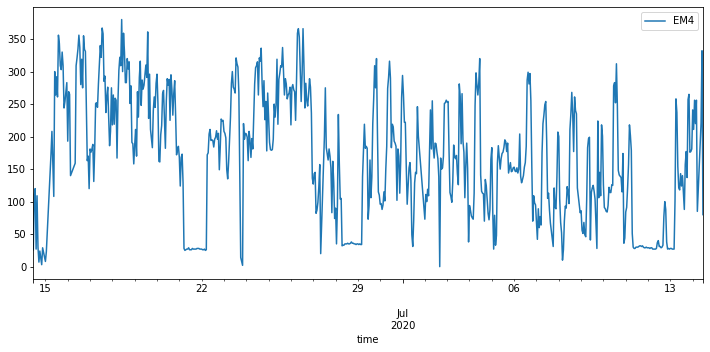

In [5]:
data['EM4'].plot(figsize = (12, 5), legend = True)

In [6]:
# Time_range = pd.DataFrame(pd.date_range(start = '2020-06-15 00:00:00', end = '2020-06-22 00:00:00', freq = 'H'))
# Time_range = Time_range.rename(columns = {0 : "time"})
# Time_range.set_index("time", inplace = True)

In [7]:
# data = data.merge(Time_range,  how = "outer", right_index=True, left_index=True)
# data.index.freq = 'H'

In [8]:
# data.head(2)

In [9]:
# data.tail(2)

In [10]:
# EM4 = data[["EM4"]]

In [11]:
# EM4 = EM4.iloc[:-1]

In [12]:
# EM4_filled = EM4.fillna(method = "ffill")

In [13]:
# EM4_filled.iloc[0] = EM4_filled.iloc[1]
# EM4_filled.index.freq = 'H'
# EM4_filled.head()

In [14]:
# fig, axs = plt.subplots(2, sharex=True, sharey=True, gridspec_kw={'hspace': 0.2}, figsize=(25,10))
# # fig.suptitle('Interpolated Series', va = 'bottom', ha = 'center', fontsize = 50)
# axs[0].plot(EM4.index, EM4['EM4'], 'tab:brown', linewidth = 3)
# axs[0].set_title('Original Series', fontsize = 20)
# axs[1].plot(EM4_filled.index, EM4_filled['EM4'], 'tab:orange', linewidth = 3)
# axs[1].set_title('Filled series', fontsize = 20)

# # Hide x labels and tick labels for all but bottom plot.
# for ax in axs:
#     ax.label_outer()

In [15]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['EM4'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.695342
p-value: 0.004179
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


In [16]:
len(data)

721

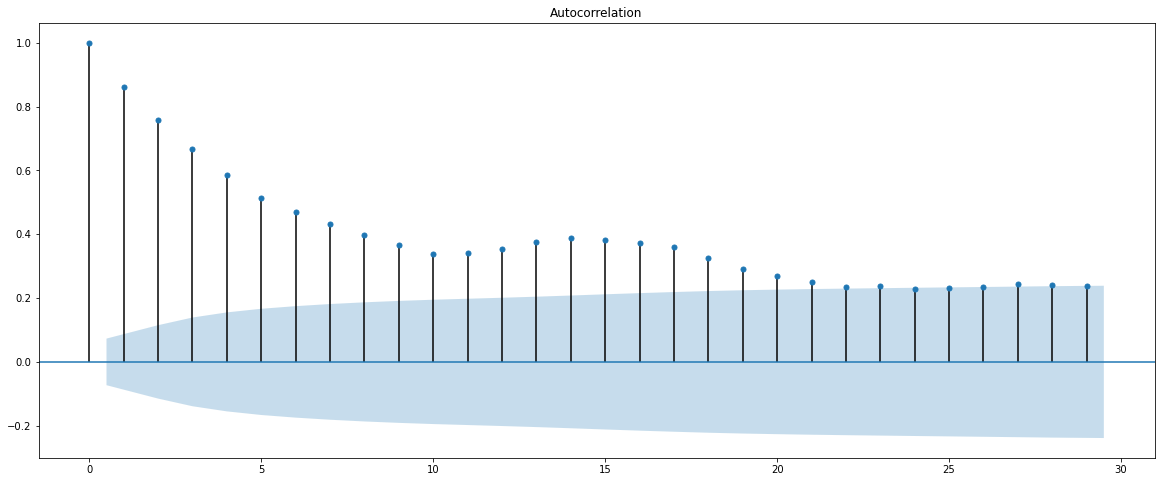

In [17]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_acf(data,ax=ax)
plt.show()

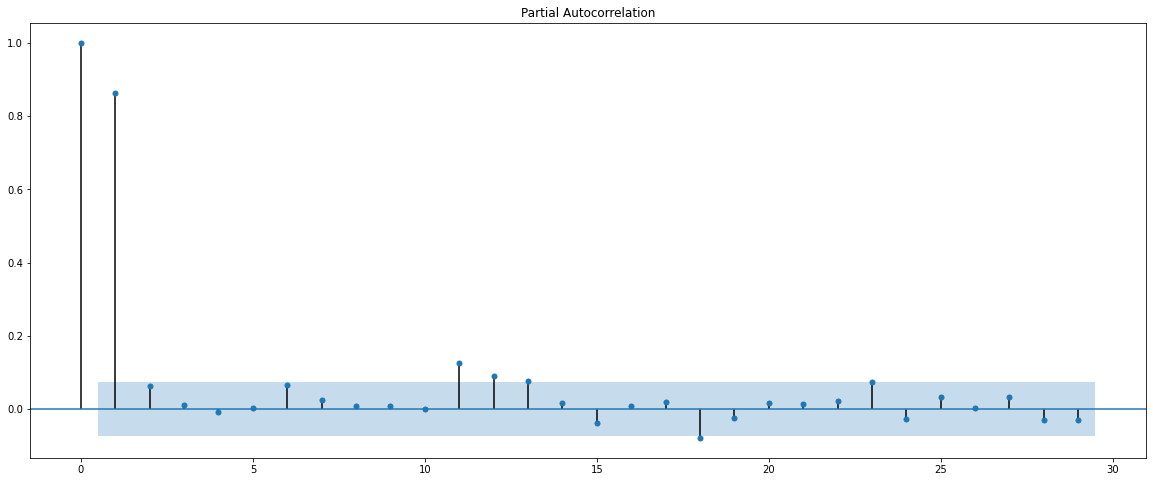

In [18]:
fig, ax = plt.subplots(figsize=(20, 8))
plot_pacf(data,ax=ax)
plt.show()

# Arima

In [19]:
train = data[:int(0.7*(len(data)))]
valid = data[int(0.7*(len(data))):]

In [21]:
#data=EM4_filled.copy()
# Import the library 
from pmdarima import auto_arima 
  
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 
  
# Fit auto_arima function to AirPassengers dataset 
model = auto_arima(train['EM4'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 25, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True)          
  
# To print the summary 


Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,12) [intercept=True]; AIC=5238.836, BIC=5259.828, Time=2.362 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=True]; AIC=6023.791, BIC=6032.188, Time=0.016 seconds
Fit ARIMA(1,0,0)x(1,1,0,12) [intercept=True]; AIC=5400.052, BIC=5416.846, Time=0.786 seconds
Fit ARIMA(0,0,1)x(0,1,1,12) [intercept=True]; AIC=5556.086, BIC=5572.880, Time=1.666 seconds
Near non-invertible roots for order (0, 0, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=False]; AIC=6021.936, BIC=6026.135, Time=0.021 seconds
Fit ARIMA(1,0,1)x(0,1,0,12) [intercept=True]; AIC=5526.198, BIC=5542.992, Time=0.100 seconds
Fit ARIMA(1,0,1)x(1,1,1,12) [intercept=True]; AIC=5240.882, BIC=5266.073, Time=1.391 seconds
Near non-invertible roots for order (1, 0, 1)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit ci

In [36]:
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  719
Model:             SARIMAX(1, 0, 1)x(1, 1, [1, 2], 12)   Log Likelihood               -3734.786
Date:                                 Thu, 16 Jul 2020   AIC                           7483.571
Time:                                         11:24:39   BIC                           7515.499
Sample:                                              0   HQIC                          7495.907
                                                 - 719                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.4798      0.190     -2.521      0.012      -0.853      -0.107
ar.L1          0.8636      0.024     35.727      0.000       0.816       0.911
ma.L1         -0.0467      0.040     -1.177      0.239      -0.125       0.031
ar.S.L12      -0.9956      0.021    -47.639      0.000      -1.037      -0.955
ma.S.L12      -0.0162      2.880     -0.006      0.996      -5.662       5.629
ma.S.L24      -0.9834      2.841     -0.346      0.729      -6.552       4.585
sigma2      2101.3556   6043.743      0.348      0.728   -9744.163    1.39e+04
===================================================================================
Ljung-Box (Q):                       68.70   Jarque-Bera (JB):               100.67
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                             0.19
Prob(H) (two-sided):                  0.51   Kurtosis:                         4.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

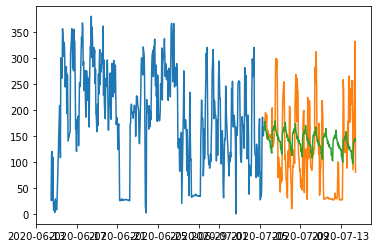

In [21]:
forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(figsize=(20,8))
plt.plot(train, label='Train',)
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

In [22]:
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])
model

Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(0,0,0,0) [intercept=True]; AIC=5318.258, BIC=5343.581, Time=0.513 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=5341.534, BIC=5349.975, Time=0.010 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=5336.631, BIC=5349.293, Time=0.057 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=5335.530, BIC=5348.192, Time=0.065 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=5339.550, BIC=5343.771, Time=0.008 seconds
Fit ARIMA(1,1,2)x(0,0,0,0) [intercept=True]; AIC=5314.944, BIC=5336.047, Time=0.485 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=5314.988, BIC=5336.091, Time=0.417 seconds
Near non-invertible roots for order (2, 1, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.0

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 2), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

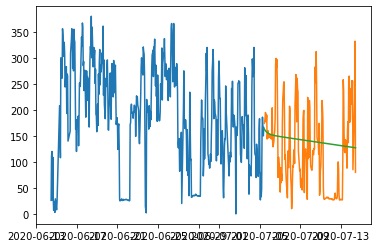

In [23]:

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

In [31]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train, order=(1,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                    EM4   No. Observations:                  719
Model:                     ARMA(1, 1)   Log Likelihood               -3783.536
Method:                       css-mle   S.D. of innovations             46.633
Date:                Thu, 16 Jul 2020   AIC                           7575.073
Time:                        11:16:43   BIC                           7593.384
Sample:                    06-14-2020   HQIC                          7582.143
                         - 07-14-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        166.2109     13.578     12.241      0.000     139.599     192.823
ar.L1.EM4      0.8788      0.020     42.872      0.000       0.839       0.919
ma.L1.EM4     -0.0442      0.043     -1.018      0.3

In [32]:
model_fit.fittedvalues

time
2020-06-14 11:00:00    166.210943
2020-06-14 12:00:00     44.523574
2020-06-14 13:00:00    114.760142
2020-06-14 14:00:00    125.370416
2020-06-14 15:00:00     48.222164
                          ...    
2020-07-14 05:00:00    243.281371
2020-07-14 06:00:00    101.838150
2020-07-14 07:00:00    123.964891
2020-07-14 08:00:00    153.318641
2020-07-14 09:00:00    182.991701
Length: 719, dtype: float64

In [25]:
#calculate rmse
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(valid,forecast))
print(rms)

77.66033270383471


In [26]:
# Split data into train / test sets 
train = data.iloc[:len(data)-2] 
test = data.iloc[len(data)-3:] # set one year(12 months) for testing 
  

from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(train['EM4'],  
                order = (1, 0, 1),  
                seasonal_order =(0, 1,[1,2], 12)) 
  
result = model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                     EM4   No. Observations:                  719
Model:             SARIMAX(1, 0, 1)x(0, 1, [1, 2], 12)   Log Likelihood               -3741.404
Date:                                 Thu, 16 Jul 2020   AIC                           7492.808
Time:                                         11:15:21   BIC                           7515.613
Sample:                                     06-14-2020   HQIC                          7501.619
                                          - 07-14-2020                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8855      0.023     38.176      0.000       0.840       0.931
ma.L1         -0.0483      0.038     -1.259      0.208      -0.124       0.027
ma.S.L12      -1.0147      0.384     -2.644      0.008      -1.767      -0.263
ma.S.L24       0.0162      0.042      0.390      0.696      -0.065       0.098
sigma2      2156.6898    835.565      2.581      0.010     519.012    3794.367
===================================================================================
Ljung-Box (Q):                       66.78   Jarque-Bera (JB):                86.54
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.18
Prob(H) (two-sided):                  0.74   Kurtosis:                         4.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

TypeError: predict() missing 1 required positional argument: 'params'

In [ ]:
# Load specific evaluation tools 
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 

In [ ]:
start = len(train) 
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set 
predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
# plot predictions and actual values 
predictions.plot(legend = True) 
test["EM4"].plot(legend = True)

In [ ]:
rmse(test["EM4"], predictions) 

In [ ]:
mean_squared_error(test["EM4"], predictions) 

In [ ]:
# Train the model on the full dataset 
model = model = SARIMAX(data['EM4'],  
                        order = (1, 0, 0),  
                        seasonal_order =(0, 1, 1, 12)) 
result = model.fit() 
  
# Forecast for the next 3 years 
forecast = result.predict(start = len(data),  
                          end = (len(data)-1) + 3,  
                          typ = 'levels').rename('Forecast') 
  
# Plot the forecast values 
data['EM4'].plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True) 

In [ ]:
start = len(train) 
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set 
predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
# plot predictions and actual values 
train.plot(figsize = (20,8), legend = True)
predictions.plot(legend = True) 
test['EM4'].plot(legend = True, lw = 4) 

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

In [ ]:
model = ARIMA(data['EM4'], order=(1,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())